In [2]:
import cv2 as cv
import numpy as np
import os
import glob
from skimage.feature import hog


In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls "/content/gdrive/My Drive/Colab Notebooks/dataset_folhas"

aroeira       mulungu_fundobranco	sibipiruna_fundobranco_grey
carro	      mulungu_fundobranco_grey	tanheiro
mulungu1.jpg  sibipiruna_fundobranco	unclass


In [5]:
samples = None
labels = None
#variaveis
samples = [] #HOGs
labels = []  #classes

#path
mulungu_path = "/content/gdrive/My Drive/Colab Notebooks/dataset_folhas/mulungu_fundobranco_grey"
sibipiruna_path = "/content/gdrive/My Drive/Colab Notebooks/dataset_folhas/sibipiruna_fundobranco_grey"

In [6]:
hist = None
#amostras positivas
for filename in glob.glob(os.path.join(mulungu_path, '*.jpg')):
    img = cv.imread(filename, 1)
    hist = hog(img)
    samples.append(hist)
    labels.append(0)

#amostras negativas
for filename in glob.glob(os.path.join(sibipiruna_path, '*.jpg')):
    img = cv.imread(filename, 1)
    hist = hog(img)
    samples.append(hist)
    labels.append(1)

In [7]:
samples


[array([0.18934616, 0.        , 0.05425407, ..., 0.07688162, 0.05135814,
        0.03960591]),
 array([0.21487225, 0.01729207, 0.12030113, ..., 0.09031154, 0.03173224,
        0.        ]),
 array([0.1496923 , 0.11383372, 0.08129114, ..., 0.15241983, 0.06102316,
        0.03805256]),
 array([0.1496923 , 0.11383372, 0.08129114, ..., 0.15241983, 0.06102316,
        0.03805256]),
 array([0.02600836, 0.03541149, 0.02496396, ..., 0.14547695, 0.02091084,
        0.        ]),
 array([0.21182073, 0.13183355, 0.13466928, ..., 0.05332973, 0.06257607,
        0.01474932]),
 array([0.1329254 , 0.07582683, 0.08629378, ..., 0.07795423, 0.07043227,
        0.        ]),
 array([0.20622606, 0.09182806, 0.04957379, ..., 0.03404867, 0.02153427,
        0.01522703]),
 array([0.10652191, 0.0090757 , 0.01256673, ..., 0.05017374, 0.06957752,
        0.114016  ]),
 array([0.14383505, 0.02996564, 0.03390225, ..., 0.0243107 , 0.05125146,
        0.        ]),
 array([0.14383505, 0.02996564, 0.03390225, ..., 0

In [8]:
labels

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [9]:
samples = np.float32(samples)
labels = np.array(labels)

In [10]:
samples

array([[0.18934616, 0.        , 0.05425407, ..., 0.07688162, 0.05135814,
        0.03960591],
       [0.21487226, 0.01729207, 0.12030113, ..., 0.09031154, 0.03173224,
        0.        ],
       [0.1496923 , 0.11383372, 0.08129114, ..., 0.15241984, 0.06102316,
        0.03805256],
       ...,
       [0.14383505, 0.02996564, 0.03390225, ..., 0.0243107 , 0.05125146,
        0.        ],
       [0.1417014 , 0.05835717, 0.0609901 , ..., 0.01908583, 0.04865951,
        0.04267721],
       [0.20504333, 0.11195431, 0.12029297, ..., 0.10264375, 0.16675143,
        0.0485443 ]], dtype=float32)

In [11]:
labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
rand = np.random.RandomState(421)
shuffle = rand.permutation(len(samples))
samples = samples[shuffle]
labels = labels[shuffle]

In [13]:
labels

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [15]:
svm = None
svm = cv.ml.SVM_create()
svm.setType(cv.ml.SVM_C_SVC)
svm.setKernel(cv.ml.SVM_RBF)
svm.setGamma(5.383)
svm.setC(2.67)

In [16]:
svm.train(samples, cv.ml.ROW_SAMPLE, labels)
svm.save('svm_data.dat')

In [17]:
from google.colab.patches import cv2_imshow

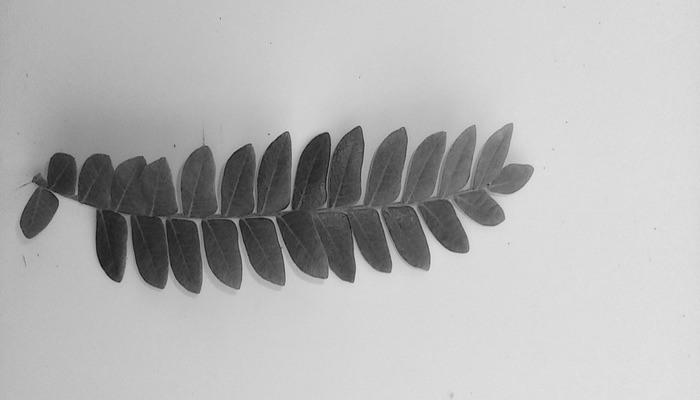

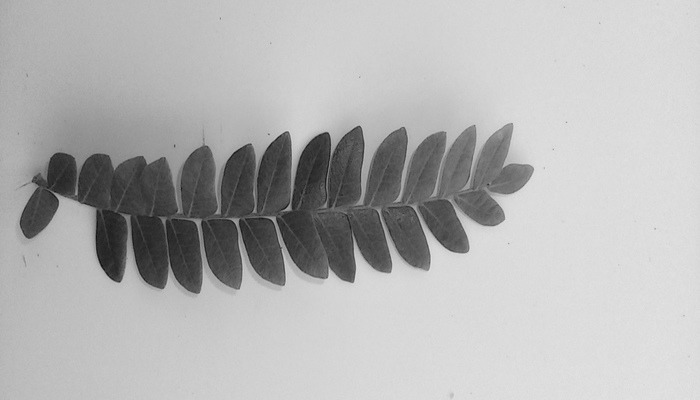

-1

In [23]:
imageDir = "/content/gdrive/My Drive/Colab Notebooks/dataset_folhas/unclass" #imagens nao classificadas
image = None
image = cv.imread(os.path.join(imageDir, "sibipiruna.jpg")) #le imagem
imagex = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image) #mostra imagem
cv2_imshow(imagex) #nao usar agora
#
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

In [24]:
#load svm
svm = cv.ml.SVM_load('svm_data.dat')

In [25]:
hist = None
sample = None
hist = hog(image)
sample = np.float32(hist)

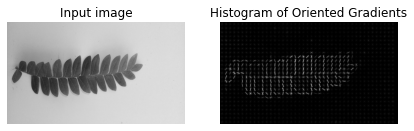

In [26]:
#2 visualizar
from skimage import data, exposure
import matplotlib.pyplot as plt

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

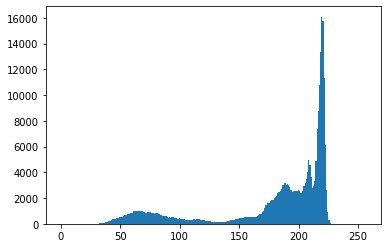

In [27]:
import matplotlib.pyplot as plt
plt.hist(imagex.ravel(),256,[0,256]);
plt.show()

In [28]:
print(hist)


[0.20504334 0.11195431 0.12029297 ... 0.10264375 0.16675142 0.0485443 ]


In [29]:
resp = None
resp = svm.predict(sample.reshape(1, -1))
print(resp)

(0.0, array([[1.]], dtype=float32))


In [30]:
print(resp[1].ravel()[0])

1.0
